# Module developed to predict prices of car based on car details

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('car details.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
data_null_screened = raw_data.dropna(axis=0)

In [6]:
data_null_screened.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### Visualizing the data to see linear conformity

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Graph of Price against Mileage')

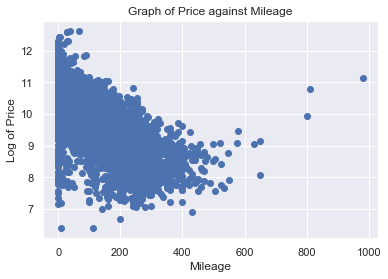

In [8]:
plt.scatter(data_null_screened['Mileage'], np.log(data_null_screened['Price']))
plt.xlabel('Mileage')
plt.ylabel('Log of Price')
plt.title('Graph of Price against Mileage')

#### There is a negative linear relationship between the price and mileage of the car

Text(0.5, 1.0, 'Graph of Price against Year')

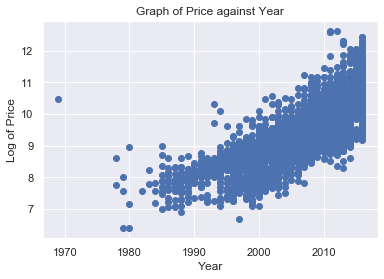

In [9]:
plt.scatter(data_null_screened['Year'], np.log(data_null_screened['Price']))
plt.xlabel('Year')
plt.ylabel('Log of Price')
plt.title('Graph of Price against Year')

#### Positive linear relationship between the price and year of manufacture of the car

#### Data Preprocessing: Cross examine the relevant data for the model

In [10]:
data_null_screened.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'], dtype=object)

In [11]:
data_null_screened['Registration'] = np.where(data_null_screened['Registration'] == 'yes',1,0)

C:\Users\Adewale\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_with_Registration_mapped = data_null_screened.copy()

In [13]:
data_with_dummies = pd.get_dummies(data_with_Registration_mapped, columns= ['Brand','Body','Engine Type'], drop_first=True)

In [14]:
data_with_dummies.head()

,Price,Mileage,EngineV,Registration,Year,Model,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,1,1991,320,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900.0,427,2.9,1,1999,Sprinter 212,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300.0,358,5.0,1,2003,S 500,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,240,4.2,1,2007,Q7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,1,2011,Rav 4,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [15]:
target = data_with_dummies['Price']

In [16]:
target.count()

4025

In [17]:
input = data_with_dummies.drop(['Price','EngineV','Model'], axis=1) # the EngiveV and model does not have significant impact on price

#### Standardize the input

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(input)   #create mean and standard devetion of all the values

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
standardized_input = scaler.transform(input)  # transforming the input values to standardized form

#### split data into train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(standardized_input,np.log(target), test_size=0.2, random_state=20)

In [23]:
X_train.shape[0]

3220

In [24]:
X_test.shape[0]

805

#### create the linear regression model

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.intercept_

9.40891843631129

In [28]:
model.coef_

array([-0.09475841,  0.25978092,  0.56297213,  0.0324683 ,  0.05137959,
       -0.17695347, -0.25602249, -0.08580928, -0.14592034, -0.17636095,
       -0.10570018, -0.23591039, -0.16048019, -0.23059225, -0.01965371,
       -0.00853078, -0.02322997])

#### testing the model

In [29]:
Prediction = model.predict(X_test)

#### Comparing the actual value with the predicted values

In [30]:
y_test[:5] 

2118    10.691922
1310     8.242756
484      9.268609
2456     9.350102
2956    10.264652
Name: Price, dtype: float64

In [31]:
model.predict(X_test[:5])

array([10.12243765,  8.30735952,  9.36299158,  9.30328541, 10.37211396])

In [32]:
model.score(X_test,y_test) # model has 81% accuracy

0.8058528229957523

#### Save model

In [33]:
import pickle

In [35]:
with open('model','wb') as model_file:
    pickle.dump(model, model_file)

In [36]:
with open('scaler','wb') as scaler_file:
    pickle.dump(scaler, scaler_file)